In [72]:
# imports:

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold , SelectKBest ,f_classif ,mutual_info_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
data.describe(include=["O"])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [6]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

<AxesSubplot:xlabel='Churn'>

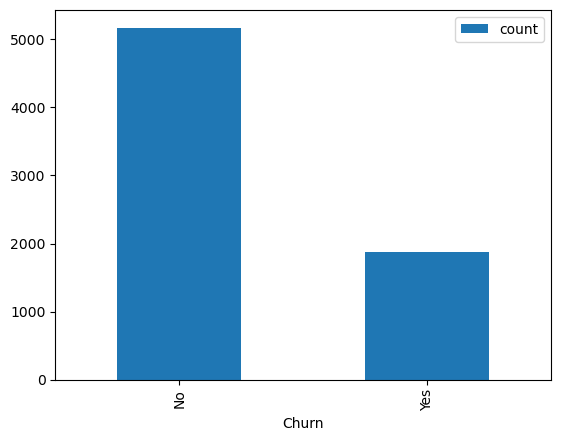

In [9]:
data["Churn"].value_counts().plot(kind="bar",legend=True)

<AxesSubplot:xlabel='InternetService'>

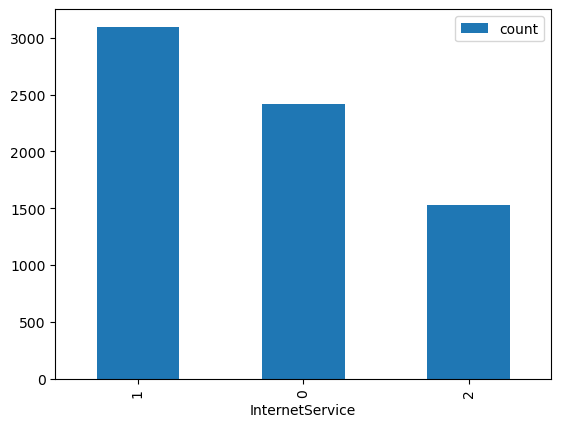

In [62]:
data["InternetService"].value_counts().plot(kind="bar",legend=True)

<AxesSubplot:xlabel='gender,Churn'>

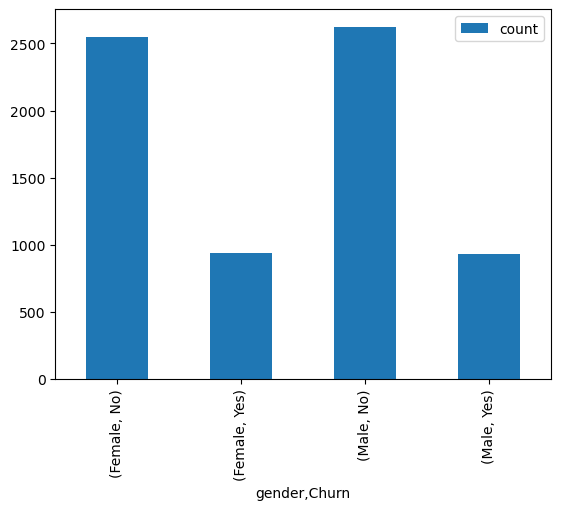

In [10]:
data.groupby(["gender"])["Churn"].value_counts().plot(kind="bar",legend=True)

<AxesSubplot:ylabel='count'>

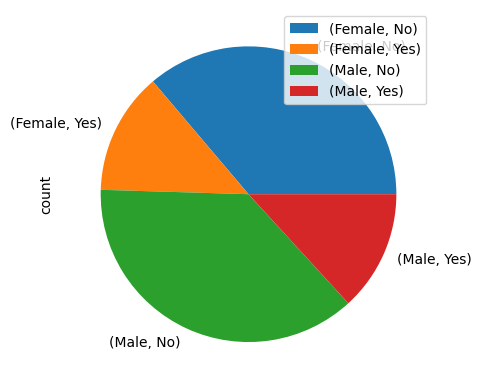

In [11]:
data.groupby(["gender"])["Churn"].value_counts().plot(kind="pie",legend=True)

In [12]:
# Extract the Numbers data:

data.select_dtypes("number").columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')

In [14]:
#Extract the objected data:

data.select_dtypes("object").columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')

In [15]:
# Extract the Discrete columns:

data.select_dtypes(include=["int64"]).columns

Index(['SeniorCitizen', 'tenure'], dtype='object')

In [16]:
# Extract Continous columns:

data.select_dtypes(include=["float64"]).columns

Index(['MonthlyCharges'], dtype='object')

In [19]:
# Extract Nomial data:
cat_as_num=data.nunique()[data.nunique()<3]
category_features=list(set(data.select_dtypes("object").columns.append(cat_as_num.index)))
print(category_features)

['gender', 'StreamingTV', 'customerID', 'PaperlessBilling', 'InternetService', 'OnlineBackup', 'Dependents', 'DeviceProtection', 'StreamingMovies', 'Contract', 'OnlineSecurity', 'Partner', 'MultipleLines', 'PhoneService', 'SeniorCitizen', 'PaymentMethod', 'TotalCharges', 'TechSupport', 'Churn']


In [20]:
# Cleaning the data:

data.isna().mean()

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

In [21]:
# fill the null values 

# Load your dataset into a pandas dataframe
df = data

# Fill null values in numeric columns with the median of the column
numeric_cols = df.select_dtypes("number").columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Fill null values in object columns with the mode of the column
object_cols = df.select_dtypes(include=['object']).columns
df[object_cols] = df[object_cols].fillna(df[object_cols].mode())


In [22]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [24]:
data.select_dtypes(include=["float64"]).columns

Index(['MonthlyCharges'], dtype='object')

In [23]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


<AxesSubplot:xlabel='MonthlyCharges'>

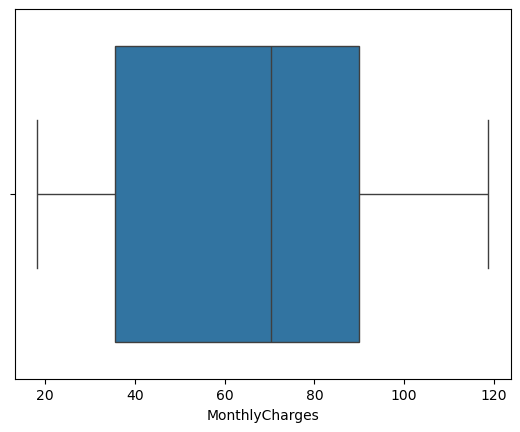

In [25]:
# from the last statistical step we found that MonthlyCharges is the only continous:

# check and calc the outliers:

sns.boxplot(x=data["MonthlyCharges"])

<AxesSubplot:xlabel='MonthlyCharges'>

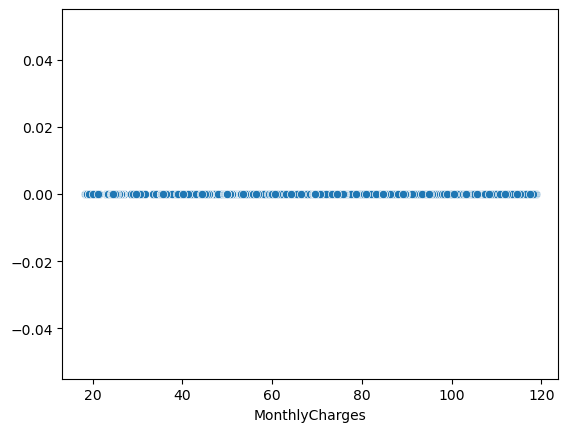

In [26]:
sns.scatterplot(x=data["MonthlyCharges"],y=np.zeros_like(data["MonthlyCharges"]))

In [27]:
# calc the outliers:

outlier =[]
q1,q3 = data["MonthlyCharges"].quantile([0.25,0.75])  

IqR = q3 - q1
low_lim = q1 - 1.5 * IqR
up_lim = q3 + 1.5 * IqR
for x in data["MonthlyCharges"]: 
    if ((x> up_lim) or (x<low_lim)): 
         outlier.append(x)
len(outlier)

0

In [28]:
print(f"value of Q1 is {q1},value of Q3 is {q3}")
print(f"low_limit={low_lim:0.2f}  and  upper_limit={up_lim:0.2f}")

value of Q1 is 35.5,value of Q3 is 89.85
low_limit=-46.02  and  upper_limit=171.38


In [74]:
selector=VarianceThreshold(threshold=0.01)
selector.fit(data.select_dtypes("number"))


G:\Jupter\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


VarianceThreshold(threshold=0.01)

In [75]:
selector.get_support(indices=True)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20], dtype=int64)

In [76]:
data.select_dtypes("number").columns[selector.get_support(indices=True)]

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [77]:
df=data.T
duplicates_values=df.duplicated().sum()
print("number of duplicated values=",duplicates_values)

number of duplicated values= 0


In [78]:
data.drop_duplicates()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,142,2505,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,498,1466,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,436,157,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,266,1400,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,729,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853,1,0,1,1,24,1,2,0,2,...,2,2,2,2,1,1,3,991,1597,0
7039,1525,0,0,1,1,72,1,2,1,0,...,2,0,2,2,1,1,1,1340,5698,0
7040,3367,0,0,1,1,11,0,1,0,2,...,0,0,0,0,0,1,2,137,2994,0
7041,5934,1,1,1,0,4,1,2,1,0,...,0,0,0,0,0,1,3,795,2660,1


In [79]:
# calc the correlation from pandas :

data.select_dtypes("number").corr()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,1.000000,0.006288,-0.002074,-0.026729,-0.012823,0.008035,-0.006483,0.004316,-0.012407,0.013292,...,-0.006918,0.001140,-0.007777,-0.016746,0.015028,-0.001945,0.011604,-0.006266,0.003027,-0.017447
gender,0.006288,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,...,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014623,-0.005291,-0.008612
SeniorCitizen,-0.002074,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,...,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.219524,0.037653,0.150889
Partner,-0.026729,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,...,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.106501,0.059568,-0.150448
Dependents,-0.012823,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,...,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.107507,-0.009572,-0.164221
tenure,0.008035,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,...,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.268133,0.158523,-0.352229
PhoneService,-0.006483,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,...,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.271209,0.083195,0.011942
MultipleLines,0.004316,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,...,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.444580,0.114955,0.038037
InternetService,-0.012407,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,...,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.244965,-0.055724,-0.047291
OnlineSecurity,0.013292,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,...,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.044692,0.042357,-0.289309


In [80]:
data.select_dtypes("number").corr(method="spearman")

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,1.000000,0.006288,-0.002074,-0.026729,-0.012823,0.009200,-0.006483,0.004423,-0.012764,0.012612,...,-0.007122,0.000645,-0.007810,-0.016763,0.014662,-0.001945,0.010826,-0.005819,0.003011,-0.017447
gender,0.006288,1.000000,-0.001874,-0.001808,0.010517,0.003486,-0.006488,-0.006626,-0.001517,-0.014319,...,0.000768,-0.006263,-0.006387,-0.008726,0.001094,-0.011754,0.017119,-0.013736,-0.005114,-0.008612
SeniorCitizen,-0.002074,-0.001874,1.000000,0.016479,-0.211185,0.018556,0.008576,0.145968,-0.016964,-0.141363,...,-0.028040,-0.163717,0.029752,0.046739,-0.143850,0.156530,-0.043703,0.221067,0.037852,0.150889
Partner,-0.026729,-0.001808,0.016479,1.000000,0.452676,0.384931,0.017706,0.142041,0.000900,0.148804,...,0.165893,0.125159,0.137336,0.129573,0.295925,-0.014877,-0.155247,0.108463,0.058947,-0.150448
Dependents,-0.012823,0.010517,-0.211185,0.452676,1.000000,0.164175,-0.001762,-0.024949,0.034373,0.161477,...,0.085442,0.142820,0.047664,0.021723,0.244120,-0.111377,-0.037590,-0.107011,-0.009878,-0.164221
tenure,0.009200,0.003486,0.018556,0.384931,0.164175,1.000000,0.008483,0.348444,-0.028575,0.318672,...,0.370751,0.317460,0.293650,0.301412,0.667623,0.007695,-0.379356,0.276417,0.133596,-0.367062
PhoneService,-0.006483,-0.006488,0.008576,0.017706,-0.001762,0.008483,1.000000,-0.037431,0.400349,-0.000943,...,0.010032,-0.005355,0.056313,0.044365,0.001842,0.016505,-0.003808,0.239701,0.081935,0.011942
MultipleLines,0.004423,-0.006626,0.145968,0.142041,-0.024949,0.348444,-0.037431,1.000000,-0.097689,-0.015199,...,0.111745,-0.010075,0.172484,0.179330,0.107037,0.164786,-0.182721,0.464210,0.112916,0.037816
InternetService,-0.012764,-0.001517,-0.016964,0.000900,0.034373,-0.028575,0.400349,-0.097689,1.000000,0.020074,...,0.070848,0.020815,0.119093,0.107663,0.079586,-0.117944,0.084686,-0.206889,-0.045192,-0.028690
OnlineSecurity,0.012612,-0.014319,-0.141363,0.148804,0.161477,0.318672,-0.000943,-0.015199,0.020074,1.000000,...,0.185368,0.303877,0.045926,0.056147,0.392417,-0.181656,-0.080632,-0.108483,0.027214,-0.303918


In [82]:
data.select_dtypes("number").corr(method="pearson")

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,1.000000,0.006288,-0.002074,-0.026729,-0.012823,0.008035,-0.006483,0.004316,-0.012407,0.013292,...,-0.006918,0.001140,-0.007777,-0.016746,0.015028,-0.001945,0.011604,-0.006266,0.003027,-0.017447
gender,0.006288,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,...,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014623,-0.005291,-0.008612
SeniorCitizen,-0.002074,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,...,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.219524,0.037653,0.150889
Partner,-0.026729,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,...,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.106501,0.059568,-0.150448
Dependents,-0.012823,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,...,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.107507,-0.009572,-0.164221
tenure,0.008035,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,...,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.268133,0.158523,-0.352229
PhoneService,-0.006483,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,...,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.271209,0.083195,0.011942
MultipleLines,0.004316,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,...,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.444580,0.114955,0.038037
InternetService,-0.012407,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,...,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.244965,-0.055724,-0.047291
OnlineSecurity,0.013292,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,...,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.044692,0.042357,-0.289309


In [84]:
data.select_dtypes("number").corr(method="kendall")

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,1.000000,0.005134,-0.001694,-0.021826,-0.010471,0.006223,-0.005294,0.003479,-0.009880,0.009750,...,-0.005587,0.000477,-0.006081,-0.012991,0.011392,-0.001588,0.008069,-0.003828,0.002052,-0.014247
gender,0.005134,1.000000,-0.001874,-0.001808,0.010517,0.002877,-0.006488,-0.006398,-0.001438,-0.013593,...,0.000728,-0.005944,-0.006050,-0.008265,0.001042,-0.011754,0.015665,-0.011224,-0.004176,-0.008612
SeniorCitizen,-0.001694,-0.001874,1.000000,0.016479,-0.211185,0.015315,0.008576,0.140942,-0.016075,-0.134195,...,-0.026571,-0.155392,0.028180,0.044270,-0.136998,0.156530,-0.039990,0.180636,0.030909,0.150889
Partner,-0.021826,-0.001808,0.016479,1.000000,0.452676,0.317714,0.017706,0.137150,0.000853,0.141259,...,0.157200,0.118794,0.130082,0.122729,0.281830,-0.014877,-0.142057,0.088626,0.048134,-0.150448
Dependents,-0.010471,0.010517,-0.211185,0.452676,1.000000,0.135506,-0.001762,-0.024090,0.032572,0.153289,...,0.080965,0.135558,0.045147,0.020576,0.232493,-0.111377,-0.034396,-0.087439,-0.008066,-0.164221
tenure,0.006223,0.002877,0.015315,0.317714,0.135506,1.000000,0.007002,0.277927,-0.022428,0.249201,...,0.289533,0.248239,0.229303,0.235361,0.545823,0.006351,-0.287716,0.190565,0.114980,-0.302965
PhoneService,-0.005294,-0.006488,0.008576,0.017706,-0.001762,0.007002,1.000000,-0.036142,0.379372,-0.000895,...,0.009506,-0.005082,0.053339,0.042021,0.001754,0.016505,-0.003484,0.195863,0.066905,0.011942
MultipleLines,0.003479,-0.006398,0.140942,0.137150,-0.024090,0.277927,-0.036142,1.000000,-0.077243,-0.013690,...,0.100405,-0.008965,0.153971,0.160408,0.098453,0.159112,-0.161481,0.365218,0.090035,0.036514
InternetService,-0.009880,-0.001438,-0.016075,0.000853,0.032572,-0.022428,0.379372,-0.077243,1.000000,0.040448,...,0.063781,0.040099,0.089610,0.080326,0.070833,-0.111764,0.075853,-0.088426,-0.029487,-0.027187
OnlineSecurity,0.009750,-0.013593,-0.134195,0.141259,0.153289,0.249201,-0.000895,-0.013690,0.040448,1.000000,...,0.183855,0.300867,0.045723,0.056115,0.353228,-0.172445,-0.063642,-0.089077,0.019920,-0.288507


In [ ]:
sns.heatmap(data.select_dtypes("number").corr(),annot=True,
    fmt='.2g')
plt.title("Correlation_MAtrix_HeatMAP")
plt.show()

C:\Users\EL-Hussein Store\AppData\Local\Temp\ipykernel_12080\3024430429.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["TotalCharges"])


<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

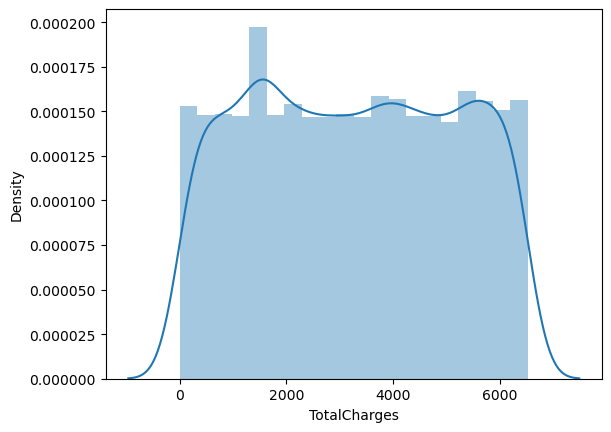

In [88]:
sns.distplot(data["TotalCharges"])

C:\Users\EL-Hussein Store\AppData\Local\Temp\ipykernel_12080\1691835588.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data["MonthlyCharges"],shade=True)


<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

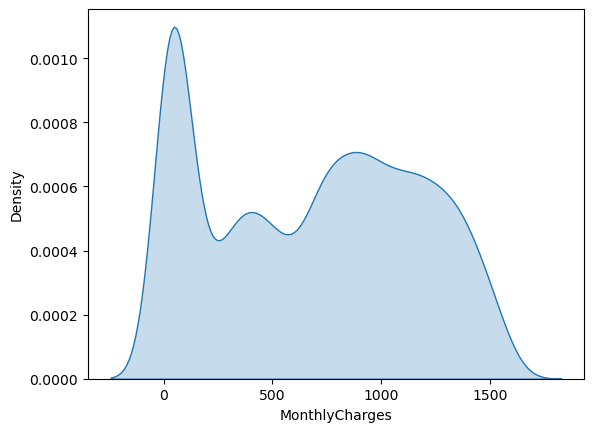

In [90]:
sns.kdeplot(data["MonthlyCharges"],shade=True)

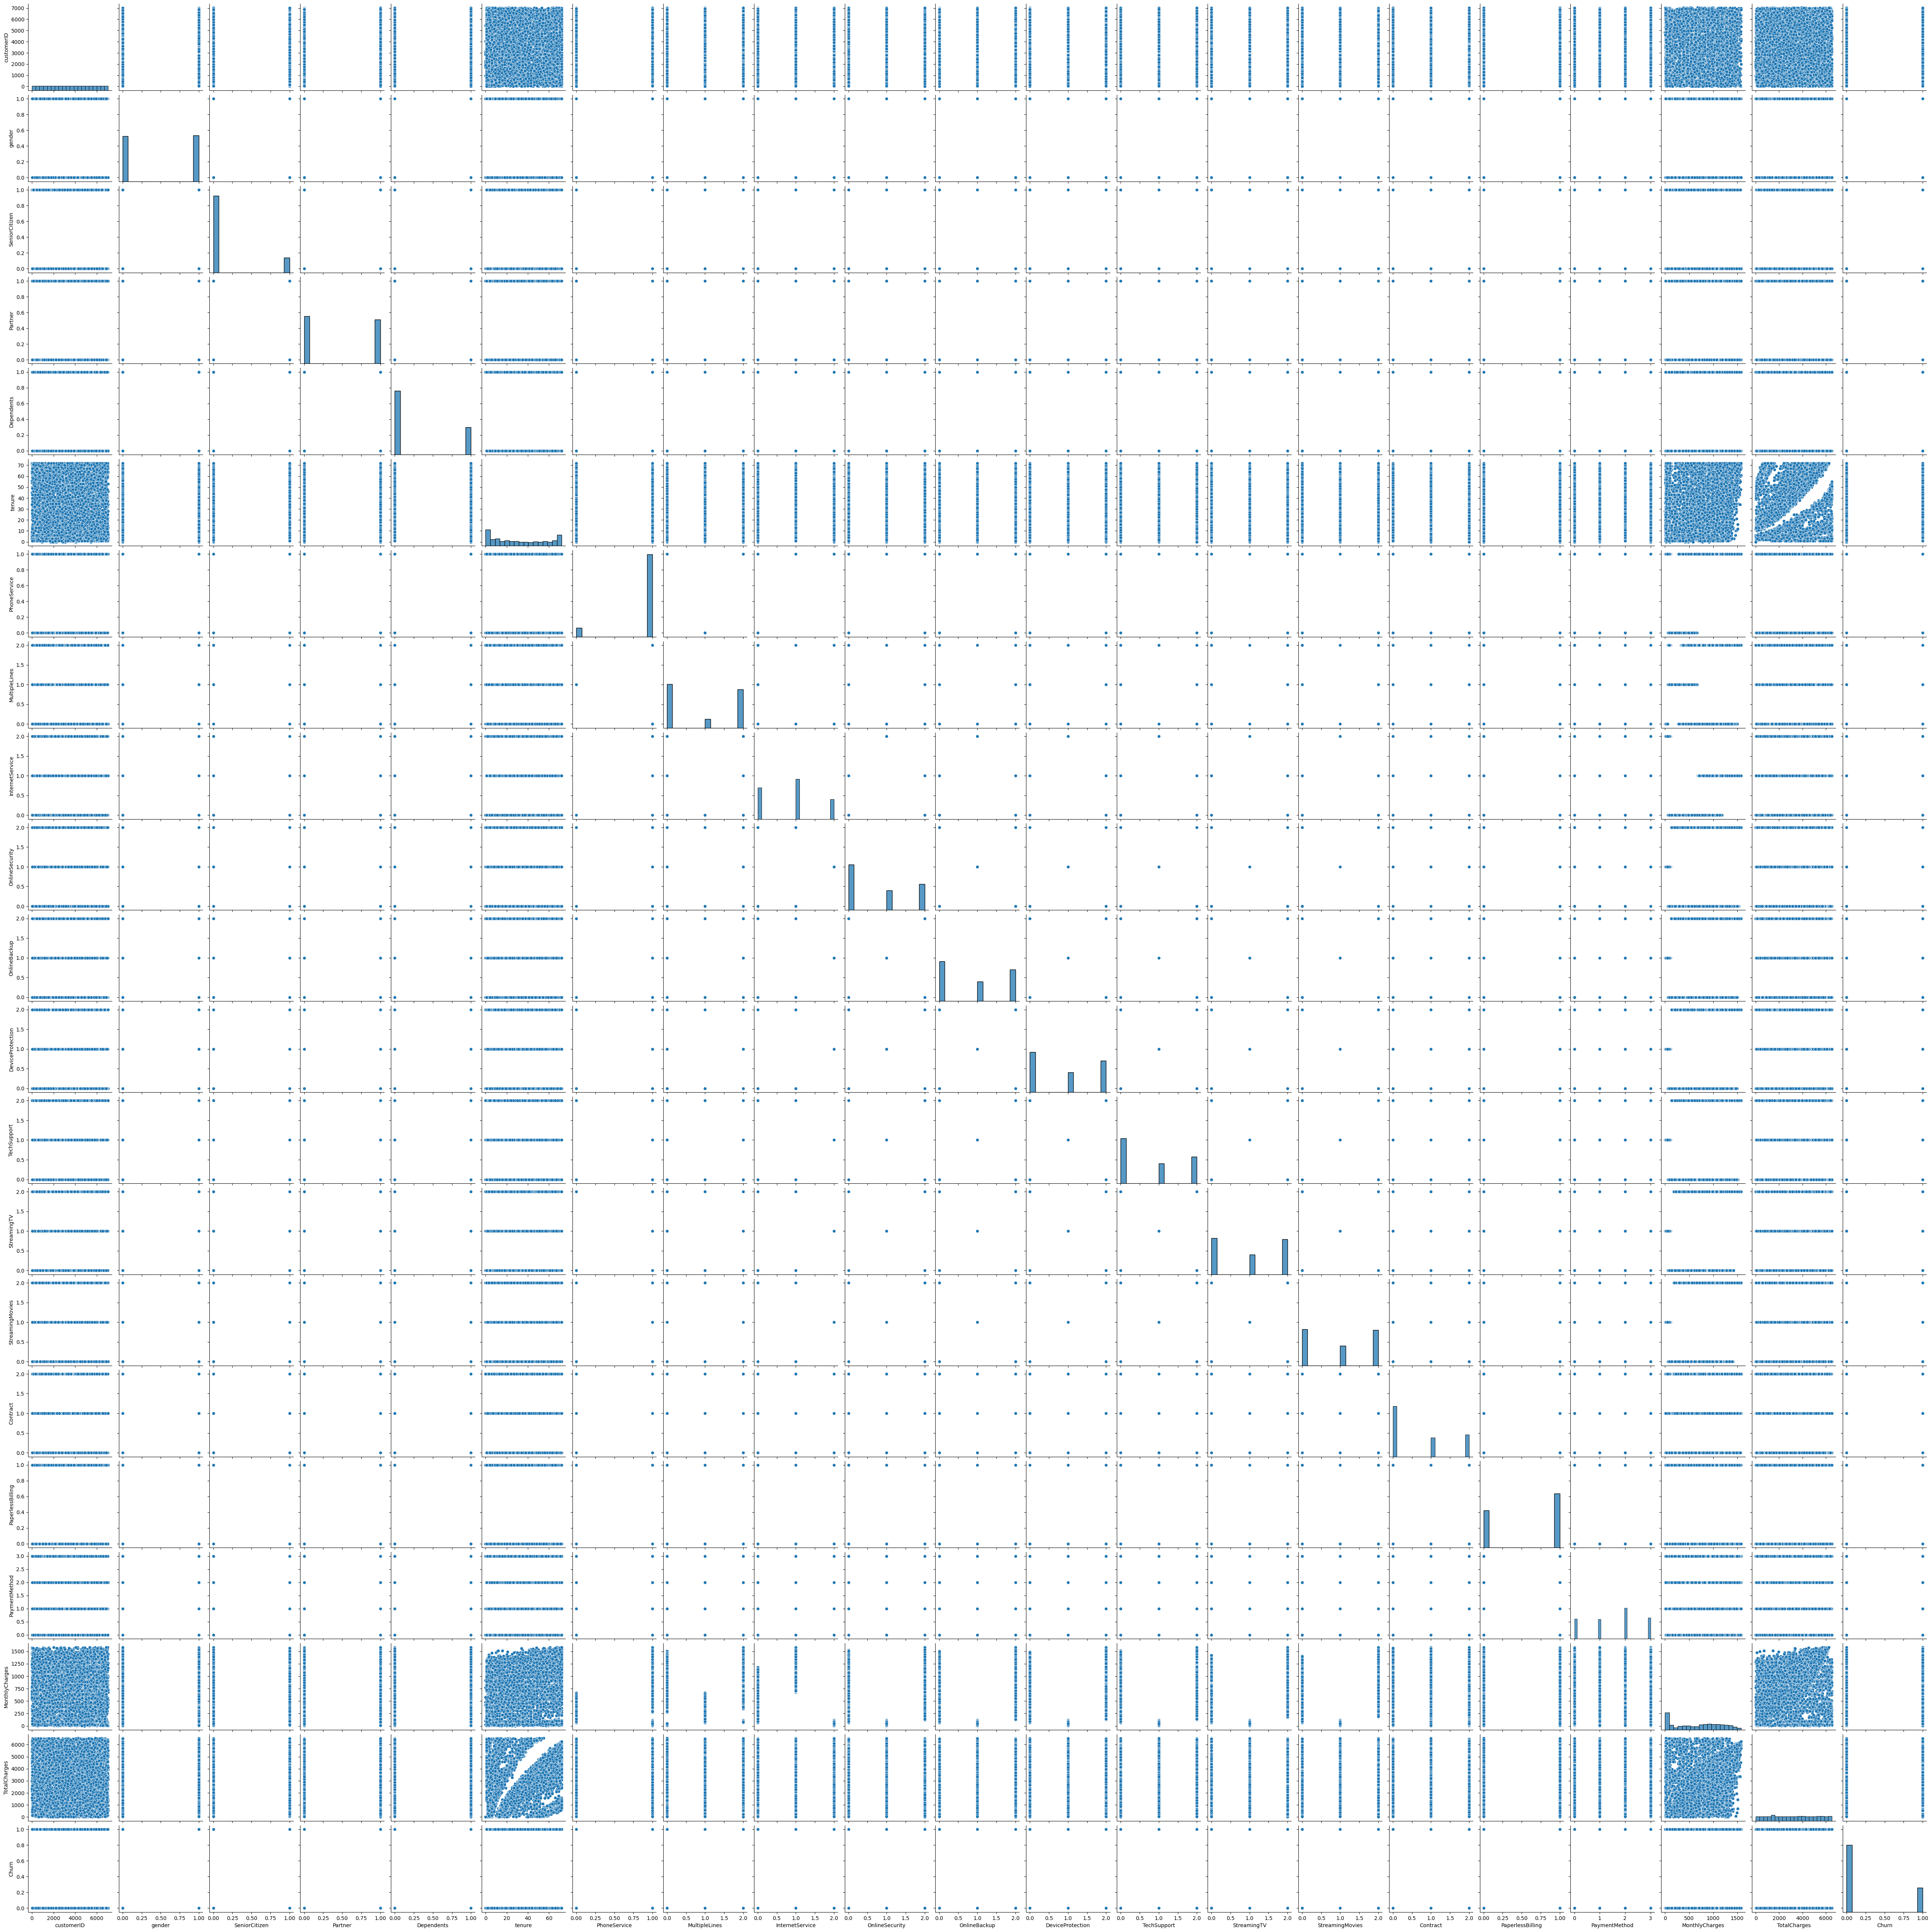

In [91]:
sns.pairplot(data.select_dtypes(include=["int64"]))

In [33]:
from sklearn.feature_selection import mutual_info_classif

mic=SelectKBest(score_func=mutual_info_classif,k=2)
mic.fit(data.drop(columns="Churn").select_dtypes("number").fillna(0),data["Churn"])
Features_MI_score=pd.Series(mic.scores_,index=data.drop(columns="Churn").select_dtypes("number").fillna(0).columns)
Features_MI_score

G:\Jupter\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


SeniorCitizen     0.007805
tenure            0.079285
MonthlyCharges    0.044115
dtype: float64

In [34]:
label_encoder=LabelEncoder()

In [63]:
for col in data:
    data[col]=label_encoder.fit_transform(data[col])
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,142,2505,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,498,1466,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,436,157,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,266,1400,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,729,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853,1,0,1,1,24,1,2,0,2,...,2,2,2,2,1,1,3,991,1597,0
7039,1525,0,0,1,1,72,1,2,1,0,...,2,0,2,2,1,1,1,1340,5698,0
7040,3367,0,0,1,1,11,0,1,0,2,...,0,0,0,0,0,1,2,137,2994,0
7041,5934,1,1,1,0,4,1,2,1,0,...,0,0,0,0,0,1,3,795,2660,1


In [64]:
data.dtypes

customerID          int64
gender              int64
SeniorCitizen       int64
Partner             int64
Dependents          int64
tenure              int64
PhoneService        int64
MultipleLines       int64
InternetService     int64
OnlineSecurity      int64
OnlineBackup        int64
DeviceProtection    int64
TechSupport         int64
StreamingTV         int64
StreamingMovies     int64
Contract            int64
PaperlessBilling    int64
PaymentMethod       int64
MonthlyCharges      int64
TotalCharges        int64
Churn               int64
dtype: object

In [65]:
x=data.drop("Churn",axis=1)
y=data["Churn"]

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,stratify=y,random_state=42)

In [67]:
model=tree.DecisionTreeClassifier(max_depth=4,random_state=42)
model.fit(x_train,y_train)


G:\Jupter\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


DecisionTreeClassifier(max_depth=4, random_state=42)

In [68]:
print(f"accuricty >>>{model.score(x_test,y_test)*100:0.2f}%")

accuricty >>>78.14%


G:\Jupter\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


In [69]:
text_represention=tree.export_text(model)
print(text_represention)

|--- feature_15 <= 0.50
|   |--- feature_9 <= 0.50
|   |   |--- feature_5 <= 10.50
|   |   |   |--- feature_8 <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_8 >  0.50
|   |   |   |   |--- class: 1
|   |   |--- feature_5 >  10.50
|   |   |   |--- feature_8 <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_8 >  0.50
|   |   |   |   |--- class: 0
|   |--- feature_9 >  0.50
|   |   |--- feature_18 <= 1127.50
|   |   |   |--- feature_5 <= 1.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_5 >  1.50
|   |   |   |   |--- class: 0
|   |   |--- feature_18 >  1127.50
|   |   |   |--- feature_5 <= 29.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_5 >  29.50
|   |   |   |   |--- class: 0
|--- feature_15 >  0.50
|   |--- feature_18 <= 1161.50
|   |   |--- feature_9 <= 0.50
|   |   |   |--- feature_19 <= 6296.00
|   |   |   |   |--- class: 0
|   |   |   |--- feature_19 >  6296.00
|   |   |   |   |--- class: 0
|   |   |--- feature_9 >  0.50
|   |   |  

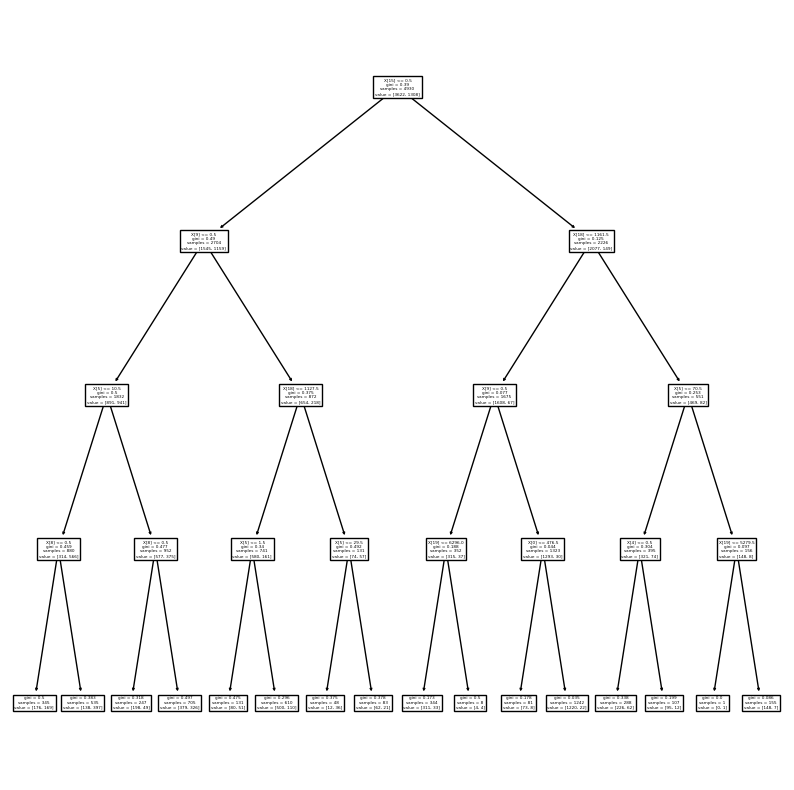

In [73]:
plt.figure(figsize=(10,10))
tree.plot_tree(model,max_depth=4)
plt.show()

In [ ]:
# Here is the End:  Name ------>>>>>  Devloper\AbdalRahmn Gameel Ahmed Hebishy 